In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import imblearn
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
import matplotlib.pyplot as plt 
from tqdm import tqdm

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, mean_squared_error, auc, accuracy_score, confusion_matrix

from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split

import xgboost as xgb
import lightgbm as lgb

In [2]:
past = pd.read_csv('PastLoans.csv')
new = pd.read_csv('NewApplications_1_Round1.csv')
past.set_index(['id'], inplace=True)
new.set_index(['id'], inplace=True)

past.income = past.income.astype('int')
new.income = new.income.astype('int')

In [3]:
past1 = past.drop(['digital2', 'digital3'], axis=1)
past1.rename(columns={'digital1':'digital'}, inplace=True)
y1 = list(past1['default'])
X1 = past1.drop(['default'], axis=1)

past2 = past.drop(['digital1', 'digital3'], axis=1)
past2.rename(columns={'digital2':'digital'}, inplace=True)
y2 = list(past2['default'])
X2 = past2.drop(['default'], axis=1)

past3 = past.drop(['digital1', 'digital2'], axis=1)
past3.rename(columns={'digital3':'digital'}, inplace=True)
y3 = list(past3['default'])
X3 = past3.drop(['default'], axis=1)


In [4]:
cat_features = ['sex', 'employment']
pass_features = ['married']
numerical_features = ['income']
numerical_pass_features = ['digital']

cat_encoder = ohe()
# numerical_encoder = StandardScaler()
numerical_encoder = Normalizer()

In [5]:
# X1[numerical_features] = numerical_encoder.fit_transform(X1[numerical_features])
# X2[numerical_features] = numerical_encoder.fit_transform(X2[numerical_features])
# X3[numerical_features] = numerical_encoder.fit_transform(X3[numerical_features])

ll_list = list(X1.income)
mini = min(ll_list)
maxi = max(ll_list)
ll = [(l - mini)/(maxi-mini) for l in ll_list]

X1.income = [(l - mini)/(maxi-mini) for l in ll_list]
X2.income = [(l - mini)/(maxi-mini) for l in ll_list]
X3.income = [(l - mini)/(maxi-mini) for l in ll_list]
# normalized = (x-min(x))/(max(x)-min(x))

dums = pd.get_dummies(X1[cat_features], drop_first=True)
X1.drop(cat_features, axis=1, inplace=True)
X2.drop(cat_features, axis=1, inplace=True)
X3.drop(cat_features, axis=1, inplace=True)

X1[dums.columns] = dums
X2[dums.columns] = dums
X3[dums.columns] = dums

In [6]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [ ]:
# oversample1 = SMOTE(sampling_strategy=0.44)
# oversample2 = SMOTE(sampling_strategy=0.44)
# oversample3 = SMOTE(sampling_strategy=0.44)

# Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)
# Xo_2, yo_2 = oversample2.fit_resample(X_train2, y_train2)
# Xo_3, yo_3 = oversample3.fit_resample(X_train3, y_train3)


In [ ]:
# cat1 = ohe().fit(X1[cat_features])
# cat2 = ohe().fit(X2[cat_features])
# cat3 = ohe().fit(X3[cat_features])

In [ ]:
# clf1 = LogisticRegression(random_state=42).fit(X_train1, y_train1)
# clf2 = LogisticRegression(random_state=42).fit(X_train2, y_train2)
# clf3 = LogisticRegression(random_state=42).fit(X_train3, y_train3)

In [ ]:
# clf1_o = LogisticRegression(random_state=42).fit(Xo_1, yo_1)
# clf2_o = LogisticRegression(random_state=42).fit(Xo_2, yo_2)
# clf3_o = LogisticRegression(random_state=42).fit(Xo_3, yo_3)

In [ ]:
# distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
# rand_clf1 = RandomizedSearchCV(clf1, distributions, random_state=42)
# search = rand_clf1.fit(X_train1, y_train1)

In [ ]:
# cross_val_score(clf1, X_train1, y_train1, scoring='f1')

In [ ]:
# f1_score(y_test1, clf1.predict(X_test1), average='macro')

In [ ]:
# cross_val_score(clf1_o, Xo_1, yo_1, scoring='f1')

In [ ]:
# f1_score(y_test1, clf1_o.predict(X_test1), average='macro')

iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  50
iteration  51
iteration  52
iteration  53
iteration  54
iteration  55
iteration  56
iteration  57
iteration  58
iteration  59
iteration  60
iteration  61
iteration  62
iteration  63
iteration  64
iteration  65
iteration  66
iteration  67
iteration  68
iteration  69


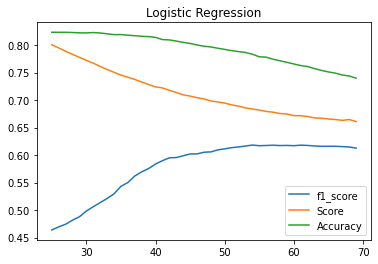

In [88]:
f1_s_logisticregression = []
score_s_logisticregression = []
predicted_length_logisticregression = []
accuracy_logisticregression = []
# auc_s = []

lst_i = range(25, 70)
for i in lst_i:
    print('iteration ', i)
    k = i/100
    oversample1 = BorderlineSMOTE(sampling_strategy=k)
    Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)

    clf1_o = LogisticRegression(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = RandomForestClassifier(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = AdaBoostClassifier(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = GradientBoostingClassifier(random_state=42).fit(Xo_1, yo_1)
    
    f1_s_logisticregression.append(f1_score(y_test1, clf1_o.predict(X_test1), average='macro'))
    # auc_s.append(auc(y_test1, clf1_o.predict(X_test1)))

    score_s_logisticregression.append(clf1_o.score(Xo_1, yo_1))
    predicted_length_logisticregression.append(clf1_o.predict(X_test1).sum())
    accuracy_logisticregression.append(accuracy_score(y_test1, clf1_o.predict(X_test1)))

plt.plot(lst_i, f1_s_logisticregression)
plt.plot(lst_i, score_s_logisticregression)
plt.plot(lst_i, accuracy_logisticregression)
# plt.plot(lst_i, predicted_length)
plt.legend(['f1_score', 'Score', 'Accuracy'])
plt.title('Logistic Regression')

plt.show()

In [ ]:
f1_s_randomforest = []
score_s_randomforest = []
predicted_length_randomforest = []
accuracy_randomforest = []
# auc_s = []

lst_i = range(40, 50)
for i in lst_i:
    print('iteration ', i)
    k = i/100
    oversample1 = BorderlineSMOTE(sampling_strategy=k)
    Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)

    # clf1_o = LogisticRegression(random_state=42).fit(Xo_1, yo_1)
    clf1_o = RandomForestClassifier(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = AdaBoostClassifier(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = GradientBoostingClassifier(random_state=42).fit(Xo_1, yo_1)
    
    f1_s_randomforest.append(f1_score(y_test1, clf1_o.predict(X_test1), average='macro'))
    # auc_s.append(auc(y_test1, clf1_o.predict(X_test1)))

    score_s_randomforest.append(clf1_o.score(Xo_1, yo_1))
    predicted_length_randomforest.append(clf1_o.predict(X_test1).sum())
    accuracy_randomforest.append(accuracy_score(y_test1, clf1_o.predict(X_test1)))

plt.plot(lst_i, f1_s_randomforest)
plt.plot(lst_i, score_s_randomforest)
plt.plot(lst_i, accuracy_randomforest)
# plt.plot(lst_i, predicted_length)
plt.legend(['f1_score', 'Score', 'Accuracy'])
plt.title('Random Forest')

plt.show()

In [ ]:
# plt.plot(lst_i, f1_s)
# plt.plot(lst_i, score_s)
# # plt.plot(lst_i, predicted_length)
# plt.legend(['f1_score', 'Accuracy'])

# plt.show()

In [ ]:
# plt.plot(lst_i, f1_s)
# plt.plot(lst_i, score_s)
# # plt.plot(lst_i, predicted_length)
# plt.legend(['f1_score', 'Accuracy'])
# plt.title('Random Forest')

# plt.show()

In [ ]:
f1_s_ada = []
score_s_ada = []
predicted_length_ada = []
accuracy_ada = []
# auc_s_ada = []

lst_i = range(40, 50)
for i in lst_i:
    print('iteration ', i)
    k = i/100
    oversample1 = BorderlineSMOTE(sampling_strategy=k)
    Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)

    # clf1_o = LogisticRegression(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = RandomForestClassifier(random_state=42).fit(Xo_1, yo_1)
    clf1_o = AdaBoostClassifier(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = GradientBoostingClassifier(random_state=42).fit(Xo_1, yo_1)
    
    f1_s_ada.append(f1_score(y_test1, clf1_o.predict(X_test1), average='macro'))
    # auc_s_ada.append(auc(y_test1, clf1_o.predict(X_test1)))

    score_s_ada.append(clf1_o.score(Xo_1, yo_1))
    predicted_length_ada.append(clf1_o.predict(X_test1).sum())
    accuracy_ada.append(accuracy_score(y_test1, clf1_o.predict(X_test1)))

plt.plot(lst_i, f1_s_ada)
plt.plot(lst_i, score_s_ada)
plt.plot(lst_i, accuracy_ada)
# plt.plot(lst_i, predicted_length)
plt.legend(['f1_score', 'Score', 'Accuracy'])
plt.title('Ada Boost')

plt.show()

In [ ]:
f1_s_gradboost = []
score_s_gradboost = []
predicted_length_gradboost = []
accuracy_gradboost = []
# auc_s_gradboost = []

lst_i = range(40, 50)
for i in lst_i:
    print('iteration ', i)
    k = i/100
    oversample1 = BorderlineSMOTE(sampling_strategy=k)
    Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)

    # clf1_o = LogisticRegression(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = RandomForestClassifier(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = AdaBoostClassifier(random_state=42).fit(Xo_1, yo_1)
    clf1_o = GradientBoostingClassifier(random_state=42).fit(Xo_1, yo_1)
    
    f1_s_gradboost.append(f1_score(y_test1, clf1_o.predict(X_test1), average='macro'))
    # auc_s_gradboost.append(auc(y_test1, clf1_o.predict(X_test1)))

    score_s_gradboost.append(clf1_o.score(Xo_1, yo_1))
    predicted_length_gradboost.append(clf1_o.predict(X_test1).sum())
    accuracy_gradboost.append(accuracy_score(y_test1, clf1_o.predict(X_test1)))

plt.plot(lst_i, f1_s_gradboost)
plt.plot(lst_i, score_s_gradboost)
plt.plot(lst_i, accuracy_gradboost)
# plt.plot(lst_i, predicted_length)
plt.legend(['f1_score', 'Score', 'Accuracy'])
plt.title('Gradient Boosting')

plt.show()

In [ ]:
f1_s_gxboost = []
score_s_gxboost = []
predicted_length_gxboost = []
accuracy_xgboost = []
# auc_s_gxboost = []

lst_i = range(40, 50)
for i in lst_i:
    print('iteration ', i)
    k = i/100
    oversample1 = BorderlineSMOTE(sampling_strategy=k)
    Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)

    clf1_o = xgb.XGBClassifier(random_state=42).fit(Xo_1, yo_1)
    
    f1_s_gxboost.append(f1_score(y_test1, clf1_o.predict(X_test1), average='macro'))
    # auc_s_gxboost.append(auc(y_test1, clf1_o.predict(X_test1)))

    score_s_gxboost.append(clf1_o.score(Xo_1, yo_1))
    predicted_length_gxboost.append(clf1_o.predict(X_test1).sum())
    accuracy_xgboost.append(accuracy_score(y_test1, clf1_o.predict(X_test1)))

plt.plot(lst_i, f1_s_gxboost)
plt.plot(lst_i, score_s_gxboost)
plt.plot(lst_i, accuracy_xgboost)
# plt.plot(lst_i, predicted_length)
plt.legend(['f1_score', 'Score', 'Accuracy'])
plt.title('XGBoost')

plt.show()

In [ ]:
f1_s_lgb = []
score_s_lgb = []
predicted_length_lgb = []
accuracy_lgb = []
# auc_s_lgb = []

lst_i = range(40, 50)
for i in lst_i:
    print('iteration ', i)
    k = i/100
    oversample1 = BorderlineSMOTE(sampling_strategy=k)
    Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)

    clf1_o = lgb.LGBMClassifier(random_state=42).fit(Xo_1, yo_1)
    
    f1_s_lgb.append(f1_score(y_test1, clf1_o.predict(X_test1), average='macro'))
    # auc_s_gxboost.append(auc(y_test1, clf1_o.predict(X_test1)))

    score_s_lgb.append(clf1_o.score(Xo_1, yo_1))
    predicted_length_lgb.append(clf1_o.predict(X_test1).sum())
    accuracy_lgb.append(accuracy_score(y_test1, clf1_o.predict(X_test1)))

plt.plot(lst_i, f1_s_lgb)
plt.plot(lst_i, score_s_lgb)
plt.plot(lst_i, accuracy_lgb)
# plt.plot(lst_i, predicted_length_lgb)
plt.legend(['f1_score', 'Score', 'Accuracy'])
plt.title('LGBM')

plt.show()

Final

In [92]:
f1_score_predlength_accuracy_xgb = []
f1_score_predlength_accuracy_lgb = []
f1_score_predlength_accuracy_logistic = []
f1_score_predlength_accuracy_randomforest = []
f1_score_predlength_accuracy_adaboost = []
f1_score_predlength_accuracy_gradientboost = []

lst_res = [f1_score_predlength_accuracy_xgb, f1_score_predlength_accuracy_lgb, 
            f1_score_predlength_accuracy_logistic, f1_score_predlength_accuracy_randomforest,
            f1_score_predlength_accuracy_adaboost, f1_score_predlength_accuracy_gradientboost]

clfs = [#xgb.XGBClassifier(random_state=42),
        lgb.LGBMClassifier(random_state=42)#,
        # LogisticRegression(random_state=42),
        # RandomForestClassifier(random_state=42),
        # AdaBoostClassifier(random_state=42),
        # GradientBoostingClassifier(random_state=42)
        ]

i = 0

for c in clfs:
    print('iteration ', c)
    oversample1 = BorderlineSMOTE(sampling_strategy=0.44)
    Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)

    clf1_o = c.fit(Xo_1, yo_1)
    
    lst_res[i].append(f1_score(y_test1, clf1_o.predict(X_test1), average='macro'))
    lst_res[i].append(accuracy_score(y_test1, clf1_o.predict(X_test1)))
    tn, fp, fn, tp = confusion_matrix(y_test1, clf1_o.predict(X_test1)).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    lst_res[i].append(sensitivity)
    lst_res[i].append(specificity)
    probas = clf1_o.predict_proba(X_test1)

    # auc_s_gxboost.append(auc(y_test1, clf1_o.predict(X_test1)))

    # lst_res[i].append(clf1_o.score(Xo_1, yo_1))
    lst_res[i].append(clf1_o.predict(X_test1).sum())

    i += 1

# plt.plot(lst_i, f1_s_lgb)
# plt.plot(lst_i, score_s_lgb)
# plt.plot(lst_i, accuracy_lgb)
# # plt.plot(lst_i, predicted_length_lgb)
# plt.legend(['f1_score', 'Score', 'Accuracy'])
# plt.title('LGBM')

# plt.show()

iteration  LGBMClassifier(random_state=42)


In [ ]:
# probas1 = [x[1] for x in probas]
# min(probas1)
# clf1_o.predict(X_test1)

In [93]:
lst_res

[[0.6093975210788737, 0.80395, 0.27623066104078764, 0.9180297962906658, 2330],
 [],
 [],
 [],
 [],
 []]

In [94]:
probas

array([[0.87487033, 0.12512967],
       [0.91793667, 0.08206333],
       [0.86340991, 0.13659009],
       ...,
       [0.85945981, 0.14054019],
       [0.94464621, 0.05535379],
       [0.91197135, 0.08802865]])

(array([1615., 3320., 4138., 3426., 2602., 2312., 1363.,  949.,  233.,
          42.]),
 array([0.00449811, 0.0847206 , 0.16494308, 0.24516557, 0.32538805,
        0.40561054, 0.48583302, 0.56605551, 0.64627799, 0.72650048,
        0.80672296]),
 <BarContainer object of 10 artists>)

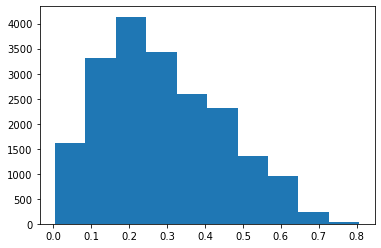

In [96]:
probas1 = [x[1] for x in probas]
probas0 = [x[0] for x in probas]
counts, bins = np.histogram(probas1)
plt.hist(probas1)

In [113]:
res = pd.DataFrame(probas, columns=['proba_no_default', 'proba_default'])
res['default_pred'] = clf1_o.predict(X_test1)
res['default_true'] = y_test1
res['be_rate'] = res['proba_default']/(1-res['proba_default'])
res['profit'] = (1+res['be_rate'])*10000*(1-res['proba_default'])-10000

prob_different = res[res['default_true'] != res['default_pred']]
prob_default = prob_different[prob_different['default_true']==1].proba_default
prob_no_default = prob_different[prob_different['default_true']==0].proba_default


In [ ]:
# res.sort_values(by=['proba_default'], inplace=True)


In [102]:
(res['proba_default']>.5).sum()

2330

In [120]:
# res['percentile'] = pd.qcut(res.proba_default, q=range(11), labels=(range(10)))
kk = 20
qq=[x/kk for x in range(kk+1)]
res['percentile'] = pd.qcut(res.proba_default, q=qq, labels=(range(kk)))
# res['percentile'] += 1
pd.DataFrame(res.groupby(by=['percentile', 'default_true', 'default_pred']).count())


proba_no_default  proba_default  \
percentile default_true default_pred                                    
0          0            0                          971            971   
                        1                            0              0   
           1            0                           30             30   
                        1                            0              0   
1          0            0                          927            927   
...                                                ...            ...   
18         1            1                          385            385   
19         0            0                            0              0   
                        1                          512            512   
           1            0                            0              0   
                        1                          487            487   

                                      be_rate  profit  
percentile default_true default_pred                   
0          0            0                 971     971  
                        1                   0       0  
           1            0                  30      30  
                        1                   0       0  
1          0            0                 927     927  
...                                       ...     ...  
18         1            1                 385     385  
19         0            0                   0       0  
                        1                 512     512  
           1            0                   0       0  
                        1                 487     487  

[80 rows x 4 columns]

In [122]:
list_sens = []
list_spec = []
list_accu = []
list_tp = []
list_tn = []
list_fp = []
list_fn = []
list_default_perc = []
for pp in tqdm(range(kk)):
    mod_res = res[res['percentile']==(pp)].copy()
    tp = mod_res[(mod_res['default_pred']==0) & (mod_res['default_true']==0)].shape[0]
    tn = mod_res[(mod_res['default_pred']==1) & (mod_res['default_true']==1)].shape[0]
    fp = mod_res[(mod_res['default_pred']==0) & (mod_res['default_true']==1)].shape[0]
    fn = mod_res[(mod_res['default_pred']==1) & (mod_res['default_true']==0)].shape[0]
    list_sens.append(tp / (tp+fn))
    list_spec.append(tn / (tn+fp))
    list_accu.append((tn+tp) / (tp+tn+fp+fn))
    list_default_perc.append((tn+fp)/(tn+tp+fn+fp))
    list_tp.append(tp)
    list_tn.append(tn)
    list_fp.append(fp)
    list_fn.append(fn)

# df_perc = pd.DataFrame(list_sens, list_spec, list_accu, columns=['sensitivity', 'specificity', 'accuracy'])
df_perc = pd.DataFrame(list_sens, columns=['sensitivity'])
df_perc['specificity'] = list_spec
df_perc['accuracy'] =  list_accu
df_perc['real_default_percentage'] = list_default_perc
df_perc['tp'] =  list_tp
df_perc['tn'] =  list_tn
df_perc['fp'] =  list_fp
df_perc['fn'] =  list_fn

df_perc


100%|██████████| 20/20 [00:00<00:00, 440.31it/s]


,sensitivity,specificity,accuracy,real_default_percentage,tp,tn,fp,fn
0,1.000000,0.000000,0.970030,0.029970,971,0,30,0
1,1.000000,0.000000,0.927928,0.072072,927,0,72,0
2,1.000000,0.000000,0.930070,0.069930,931,0,70,0
3,1.000000,0.000000,0.895896,0.104104,895,0,104,0
4,1.000000,0.000000,0.889662,0.110338,895,0,111,0
5,1.000000,0.000000,0.898390,0.101610,893,0,101,0
6,1.000000,0.000000,0.890000,0.110000,890,0,110,0
7,1.000000,0.000000,0.891109,0.108891,892,0,109,0
8,1.000000,0.000000,0.860861,0.139139,860,0,139,0
9,1.000000,0.000000,0.862413,0.137587,865,0,138,0


In [123]:
res_f = res.join(df_perc, on='percentile', how='left')
res_f['be_rate_new'] = (res_f['real_default_percentage'])/(1-res_f['real_default_percentage'])
res_f

,proba_no_default,proba_default,default_pred,default_true,be_rate,profit,percentile,sensitivity,specificity,accuracy,real_default_percentage,tp,tn,fp,fn,be_rate_new
0,0.874870,0.125130,0,0,0.143027,0.0,3,1.0,0.0,0.895896,0.104104,895,0,104,0,0.116201
1,0.917937,0.082063,0,0,0.089400,0.0,1,1.0,0.0,0.927928,0.072072,927,0,72,0,0.077670
2,0.863410,0.136590,0,0,0.158198,0.0,3,1.0,0.0,0.895896,0.104104,895,0,104,0,0.116201
3,0.633075,0.366925,0,0,0.579593,0.0,14,1.0,0.0,0.784785,0.215215,784,0,215,0,0.274235
4,0.540033,0.459967,0,0,0.851738,0.0,16,1.0,0.0,0.720000,0.280000,720,0,280,0,0.388889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.983305,0.016695,0,0,0.016978,0.0,0,1.0,0.0,0.970030,0.029970,971,0,30,0,0.030896
19996,0.799016,0.200984,0,0,0.251540,0.0,6,1.0,0.0,0.890000,0.110000,890,0,110,0,0.123596
19997,0.859460,0.140540,0,0,0.163522,0.0,3,1.0,0.0,0.895896,0.104104,895,0,104,0,0.116201
19998,0.944646,0.055354,0,0,0.058597,0.0,0,1.0,0.0,0.970030,0.029970,971,0,30,0,0.030896


In [28]:
quartiles_vals = pd.DataFrame(range(10), columns=['quartile'])
quartiles_vals['quartile'] += 1
quartiles_vals['']


In [13]:
res.nlargest(3,'default_pred')

,proba_no_default,proba_default,default_pred,default_true,be_rate,profit
9,0.449991,0.550009,1,0,1.222265,0.0
11,0.392242,0.607758,1,0,1.549449,0.0
14,0.463053,0.536947,1,0,1.159578,0.0


In [ ]:
10000*1.2*10000

(array([5.620e+02, 6.180e+02, 8.480e+02, 1.147e+03, 1.383e+03, 1.537e+03,
        1.554e+03, 1.120e+03, 1.285e+03, 1.072e+03, 1.003e+03, 8.140e+02,
        6.960e+02, 6.630e+02, 6.200e+02, 4.100e+02, 3.500e+02, 2.810e+02,
        2.620e+02, 1.050e+02, 4.700e+01, 4.100e+01, 1.700e+01, 9.000e+00,
        1.000e+00]),
 array([0.00449811, 0.03658711, 0.0686761 , 0.1007651 , 0.13285409,
        0.16494308, 0.19703208, 0.22912107, 0.26121007, 0.29329906,
        0.32538805, 0.35747705, 0.38956604, 0.42165504, 0.45374403,
        0.48583302, 0.51792202, 0.55001101, 0.58210001, 0.614189  ,
        0.64627799, 0.67836699, 0.71045598, 0.74254498, 0.77463397,
        0.80672296]),
 <BarContainer object of 25 artists>)

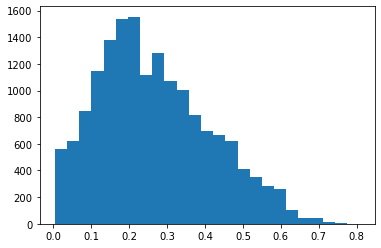

In [98]:
vals0 = list(res[res['default_true']==0].proba_default)

plt.hist(vals0, bins=25)

(array([ 16.,  43.,  66., 115., 168., 185., 198., 163., 243., 191., 227.,
        200., 204., 245., 231., 196., 187., 196., 211., 104.,  52.,  60.,
         37.,  14.,   3.]),
 array([0.01211473, 0.04370994, 0.07530515, 0.10690036, 0.13849557,
        0.17009078, 0.20168599, 0.2332812 , 0.26487641, 0.29647162,
        0.32806684, 0.35966205, 0.39125726, 0.42285247, 0.45444768,
        0.48604289, 0.5176381 , 0.54923331, 0.58082852, 0.61242373,
        0.64401894, 0.67561415, 0.70720936, 0.73880457, 0.77039978,
        0.80199499]),
 <BarContainer object of 25 artists>)

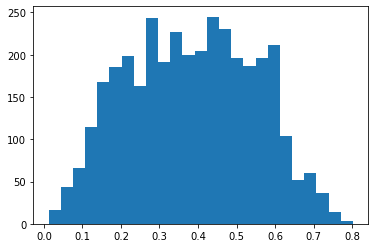

In [99]:
vals1 = list(res[res['default_true']==1].proba_default)
plt.hist(vals1, bins=25)

In [ ]:
counts, bins = np.histogram(prob_default)
plt.hist(prob_default, bins=25)

In [ ]:
counts, bins = np.histogram(prob_no_default)
plt.hist(prob_no_default, bins=25)

TPOT

In [ ]:
tpot = TPOTClassifier()
tpot.fit(X_train, y_train)
tpot.score(X_test, y_test)

In [ ]:
import tpot 


tpot = TPOTClassifier()
tpot.fit(X_train1, y_train1)
tpot.score(X_test1, y_test1)

# # let's try tpot
# # define evaluation procedure
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# # define search
# model = TPOTRegressor(generations=5, population_size=50, scoring='neg_mean_absolute_error', cv=cv, verbosity=2, random_state=1, n_jobs=-1)


In [ ]:
from tpot import TPOTClassifier
# from sklearn.datasets import load_digits
# from sklearn.model_selection import train_test_split
import sklearn.metrics
import timeit

# create train and test sets

tpot = TPOTClassifier(verbosity=3, 
                      scoring="f1_macro", 
                      random_state=42,
                      n_jobs=-1, 
                      generations=10, 
                      population_size=100)
# run three iterations and time them
for x in range(3):
    start_time = timeit.default_timer()
    tpot.fit(X_train1, y_train1)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    print('yo')
    scores.append(tpot.score(X_test1, y_test1))
    tpot.export('tpot_mnist_pipeline.py')
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)